# 1. Introduction

시작 예측 경쟁 시리즈- 어떤 승객이 이송되었는지 예측하기.

'우주선의 손상된 컴퓨터 시스템에서 복구된 기록을 사용하여 이상 현상에 의해 승객이 이송되었습니다.'

분류 정확도에 따라서 평가될 것임.

# 2. Imports

In [3]:
pip install ipython[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 16.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.1/298.1 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.3/147.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.7/280.7 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.7/235.7 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.8/99.8 kB 

In [6]:
from Ipython.display import clear_output
!pip3 install -U lazypredict
!pip3 install -U pandas #Upgrading pandas

clear_output()

ModuleNotFoundError: No module named 'Ipython'

In [5]:
pip install lazypredict #머신러닝 자동화 관련 파이썬 오픈소스 프로젝트

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np #벡터 및 행렬 연산이 편리함. 고성능의 수치계산. 난수 생성.
import pandas as pd #데이터 처리와 분석, 행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있음. 대용량의 데이터들을 처리하는데 매우 편리
import seaborn as sns #데이터 분포 시각화. 손쉽게 그래프 그리기. 다양한 색상 테마와 통계용 차트 등의 기능이 추가됨.
import plotly.express as px #데이터 시각화. 그래프 생성 및 raw 데이터 수정까지 가능. graph_objects에 비해 사용법이 쉬움.
import matplotlib.pyplot as plt #데이터 시각화. 기본 그래프 그리기.
import plotly.graph_objects as go #데이터 시각화. 그래프 구성 요소를 세부적으로 지정하여 입력해 주어야하는 방식.
from plotly.subplots import make_subplots #데이터 시각화. 그래프 나눠그리기.

from sklearn.impute import SimpleImputer #결측치 채워넣기
from sklearn.metrics import accuracy_score #분류 성능 평가
from sklearn.preprocessing import LabelEncoder #스케일링, 변환
from sklearn.model_selection import StratifiedKFold, train_test_split #데이터 분할

from lightgbm import LGBMClassifier #Parameter 튜닝하기. tree 기반 학습 알고리즘.
import lazypredict #머신러닝 자동화
from lazypredict.Supervised import LazyClassifier

import time #날짜 및 시간 데이터 다루기
import warnings #경고 제어
warnings.filterwarnings('ignore') #warnings 라이브러리로 경고 메시지 무시하기

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ModuleNotFoundError: No module named 'lazypredict'

# 3. Data Loading and Preparation

<h3> Column Descriptions </h3><hr>
* PassengerId <br>
* HomePlanet <br>
* CryoSleep <br>
* Cabin <br>
* Destination <br>
* Age <br>
* Vip <br>
* RoomService <br>
* Name <br>
* Transported <br>

<h3> Exploring Train Data </h3><hr>
* Train 데이터에 14개의 열과 8693개의 행이 있음.<br>
* Train 데이터에 2324개의 결측치가 존재함.<br>
* 12개의 모든 행에 결측값이 존재함 (CryoSleep이 가장 많은 결측치(217개)를 가짐.)<br>
* Transported이 train 데이터셋에서의 target 변수임.<h3> Exploring Train Data </h3><hr>
* Train 데이터에 14개의 열과 8693개의 행이 있음.<br>
* Train 데이터에 2324개의 결측치가 존재함.<br>
* 12개의 모든 행에 결측값이 존재함 (CryoSleep이 가장 많은 결측치(217개)를 가짐.)<br>
* Transported이 train 데이터셋에서의 target 변수임.

In [7]:
train=pd.read_csv('/kaggle/input/kaggletanic/train.csv')
test=pd.read_csv('/kaggle/input/kaggletanic/test.csv')
submission=pd.read_csv('/kaggle/input/kaggletanic/sample_submission.csv')

<h3> Quick view of Train Data </h3>

In [8]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
print(f'\033[94mNumber of rows in train data: {train.shape[0]}') #shape: 행의 수와 열의 수를 카운트함
print(f'\033[94mNumber of columns in train data: {train.shape[1]}')
print(f'\033[94mNumber of values in train data: {train.count().sum()}') #count: 숫자를 포함하고 있는 셀의 개수와 인수 목록에 포함된 숫자 개수를 셈
print(f'\033[94mNumber missing values in train data: {sum(train.isna().sum())}') #isna: 결측치 확인

Number of rows in train data: 8693
Number of columns in train data: 14
Number of values in train data: 119378
Number missing values in train data: 2324


<h3> Column Wise missing values </h3>

In [11]:
print(f'\033[94m')
print(train.isna().sum().sort_values(ascending=False)) #값 기준 정렬


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


<h3> Basic statistics of training data </h3>

In [12]:
train.describe() #통계량 요약

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<h3> Exploring Test Data </h3><hr>
* Test 데이터에는 13개의 열과 4277개의 행이 있음. <br>
* Train 데이터에는 1117개의 결측치가 있음. <br>
* 모든 12개의 열은 결측치를 가짐. (FoodCourt는 가장 많은 결측치(106개)를 가짐)

<h3> Quick view of Test Data </h3>

In [13]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [14]:
print(f'\033[94mNumber of rows in test data: {test.shape[0]}')
print(f'\033[94mNumber of columns in test data: {test.shape[1]}')
print(f'\033[94mNumber of values in train data: {test.count().sum()}')
print(f'\033[94mNumber missing values in test data: {sum(test.isna().sum())}')

Number of rows in test data: 4277
Number of columns in test data: 13
Number of values in train data: 54484
Number missing values in test data: 1117


<h3> Column Wise missing values </h3>

In [15]:
print(f'\033[94m')
print((test.isna().sum().sort_values(ascending=False)))


FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64


<h3> Basic Statisrics of test data </h3>

In [16]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


**<h3>Submission File</h3>**

<h3> Quick view of Submission File </h3>

In [17]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


# 4. EDA

<h3> Overview of Data </h3>

In [21]:
train.drop(["passengerId"],axis=1,inplace=True) #drop: 행과 열을 삭제
test.drop(["passengerId"],axis=1,inplace=True)
TARGET='Transported'
FEATURES=[col for col in train.columns if col != TARGET]
RANDOM_STATE=12

KeyError: "['passengerId'] not found in axis"

In [26]:
train.iloc[:,:-1].describe().T.sort_values(by='std',ascending=False)
.style.background_gradient(cmap='GnBu')
.bar(subset=["max"],color='#BB0000')
.bar(subset=["mean",],color='green')
#iloc: 행단위 데이터 읽기
#style: 스타일 기능
#bar: 막대그래프 표현

SyntaxError: invalid syntax (3880522417.py, line 2)

<h3> Null Value Distribution </h3><hr>

<h5>&lt;결측치 관찰하기&gt;</h5>
* 최대 결측치는 행에 3, 최소 결측치는 없음.  <br>
* train과 test의 결측치는 비슷함. <br>
* 76%로 결측치가 없음. <br>
* 나머지 24%는 1~3개의 결측치가 있음.

<h3> Column wise Null Value Distribution </h3>

In [27]:
test_null = pd.DataFrame(test.isna().sum())
test_null = test_null.sort_values(by = 0 ,ascending = False)
train_null = pd.DataFrame(train.isna().sum())
train_null = train_null.sort_values(by = 0 ,ascending = False)[:-1]

fig = make_subplots(rows=1, cols=2, column_titles = ["Train Data", "Test Data"] ,x_title="Missing Values") #make_subplots: 서브플롯 생성
fig.add_trace(go.Bar(x=train_null[0], y=train_null.index, orientation="h",marker=dict(color=[n for n in range(12)], line_color='rgb(0,0,0)' , line_width = 2,coloraxis="coloraxis")),1, 1)
fig.add_trace(go.Bar(x=test_null[0], y=test_null.index,orientation="h",marker=dict(color=[n for n in range(12)], line_color='rgb(0,0,0)', line_width = 2,coloraxis="coloraxis")),1, 2)
fig.update_layout(showlegend=False, title_text="Column wise Null Value Distribution", title_x=0.5)
#add_trace: 파이썬 시각화. 그래프 그리기
#update_layout: 그래프 생성 완료 후 layout 정보를 업데이트 해주는 함수

<h3> Row wise Null Value Distribution </h3>

In [28]:
missing_train_row = train.isna().sum(axis=1)
missing_train_row = pd.DataFrame(missing_train_row.value_counts()/train.shape[0]).reset_index()
missing_test_row = test.isna().sum(axis=1)
missing_test_row = pd.DataFrame(missing_test_row.value_counts()/test.shape[0]).reset_index()
missing_train_row.columns = ['no', 'count']
missing_test_row.columns = ['no', 'count']
missing_train_row["count"] = missing_train_row["count"]*100
missing_test_row["count"] = missing_test_row["count"]*100


fig = make_subplots(rows=1, cols=2,column_titles = ["Train Data", "Test Data"] ,x_title="Missing Values",)

fig.add_trace(go.Bar(x=missing_train_row["no"], y=missing_train_row["count"]  ,marker=dict(color=[n for n in range(4)], line_color='rgb(0,0,0)' ,line_width = 3,coloraxis="coloraxis")),1, 1)
fig.add_trace(go.Bar(x= missing_test_row["no"], y=missing_test_row["count"],marker=dict(color=[n for n in range(4)], line_color='rgb(0,0,0)',line_width = 3 ,coloraxis="coloraxis")),1, 2)
fig.update_layout(showlegend=False, title_text="Row wise Null Value Distribution", title_x=0.5)

<h3> Continuos and Categorical Data Distribution </h3>

<h4>Observations in Null Value Distribution</h4> <hr>
* 12개의 특성 중 6개는 연속적이고, 2개는 텍스트 데이터, 4개는 범주형임. <br>
* HomePlanet과 Destination은 3개의 다른 독특한 값을 가짐. <br>
* Cryosleep과 VIP는 bool 특성을 가짐.

In [29]:
df = pd.concat([train[FEATURES], test[FEATURES]], axis=0) #concat: 여러 범위 및 문자열의 텍스트를 결합
text_features = ["Cabin", "Name"]
cat_features = [col for col in FEATURES if df[col].nunique() < 25 and col not in text_features ]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25 and col not in text_features ]

del df
print(f'\033[94mTotal number of features: {len(FEATURES)}')
print(f'\033[94mNumber of categorical features: {len(cat_features)}')
print(f'\033[94mNumber of continuos features: {len(cont_features)}')
print(f'\033[94mNumber of text features: {len(text_features)}')

labels=['Categorical', 'Continuos', "Text"]
values= [len(cat_features), len(cont_features), len(text_features)]
colors = ['#DE3163', '#58D68D']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0, 0 ],marker=dict(colors=colors, line=dict(color='#000000', width=2)))])
fig.show()

Total number of features: 12
Number of categorical features: 4
Number of continuos features: 6
Number of text features: 2


<h3>Feature Distribution of Continous Features</h3>

<h4>Distribution of Age</h4>

In [30]:
train_age = train.copy()
test_age = test.copy()
train_age["type"] = "Train"
test_age["type"] = "Test"
ageDf = pd.concat([train_age, test_age])
fig = px.histogram(data_frame = ageDf, x="Age",color= "type",color_discrete_sequence =  ['#58D68D','#DE3163'],marginal="box",nbins= 100,template="plotly_white")
fig.update_layout(title = "Distribution of Age" , title_x = 0.5)
fig.show()

<h3>Feature Distribution of Categorical Features</h3>

ValueError: could not convert string to float: 'Europa'

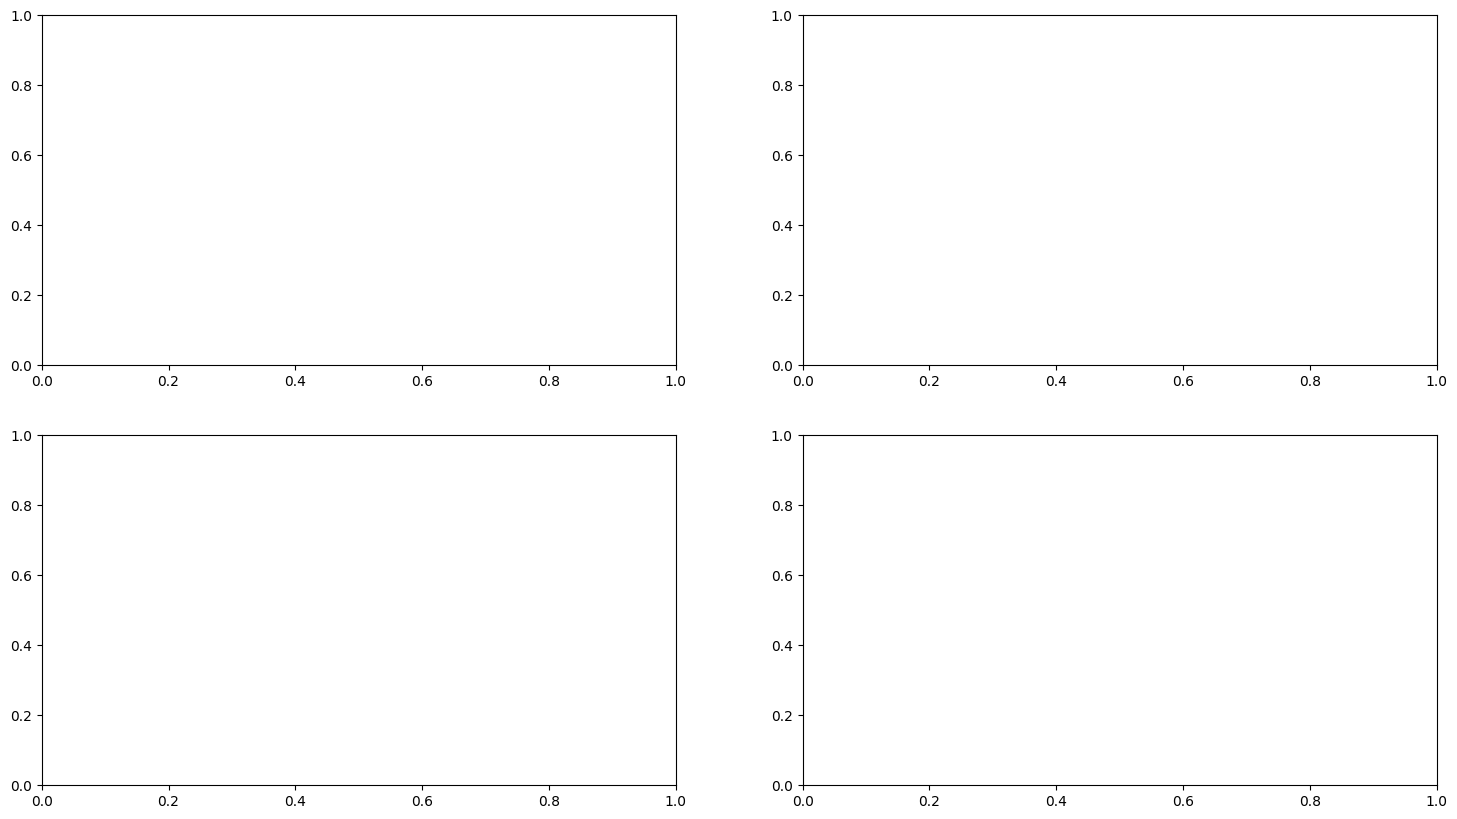

In [31]:
if len(cat_features) == 0 :
    print("No Categorical features")
else:
    ncols = 2
    nrows = 2

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 10))
    for r in range(nrows):
        for c in range(ncols):
            col = cat_features[r*ncols+c]
            sns.countplot(train[col],ax = axes[r,c] ,palette = "viridis", label='Train data')
            sns.countplot(test[col],ax = axes[r,c] ,palette = "magma", label='Test data')
            axes[r,c].legend()
            axes[r,c].set_ylabel('')
            axes[r,c].set_xlabel(col, fontsize=20)
            axes[r,c].tick_params(labelsize=10, width=0.5)
            axes[r,c].xaxis.offsetText.set_fontsize(4)
            axes[r,c].yaxis.offsetText.set_fontsize(4)
    plt.show()
#countplot: 범주형 변수의 범주별 데이터수 세기
#axis: 현재 좌표축의 x축 제한과 y축 제한을 반환
#legend: 그래프에 데이터의 종류를 표시하기 위한 텍스트
#tick_params: 눈금의 스타일을 다양하게 설정

<h3>Target Distribution</h3>

<h4>&lt;Observatoins in Null Value Distribution&gt;</h4> <hr>
* 두 개의 target 값- 0과 1. <br>
* 각각의 target 값은 거의 동등하게 분포됨.

In [32]:
target_df = pd.DataFrame(train[TARGET].value_counts()).reset_index()
target_df.columns = [TARGET, 'count']
fig = px.bar(data_frame =target_df, x = TARGET,y = 'count') 
fig.update_traces(marker_color =['#58D68D','#DE3163'], marker_line_color='rgb(0,0,0)',marker_line_width=2,)
fig.update_layout(title = "Target Distribution",template = "plotly_white",title_x = 0.5)
print("\033[94mPercentage of Transported = 0: {:.2f} %".format(target_df["count"][0] *100 / train.shape[0]))
print("\033[94mPercentage of Transported = 1: {:.2f} %".format(target_df["count"][1]* 100 / train.shape[0]))
fig.show()
#update_trace: 이미 생성된 trace의 type, 색, 스타일, 템플릿 등 추가 편집 가능
#reset_index: 설정 인덱스를 제거하고 기본 인덱스(0,1,2, ... , n)로 변경

Percentage of Transported = 0: 50.36 %
Percentage of Transported = 1: 49.64 %


<h3>Correlation matrix</h3>

In [33]:
fig = px.imshow(train.corr() ,text_auto=True, aspect="auto" , color_continuous_scale = "viridis")
fig.show()
#imshow: uint8, double type 데이터를 영상으로 출력

/tmp/ipykernel_34/1157787600.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# 5. Data Pre-Processing

<h3>Imputing Missing Values</h3>

In [34]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy=STRATEGY )
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])
train["HomePlanet"].fillna('Z', inplace=True)
test["HomePlanet"].fillna('Z', inplace=True)
#fillna: 결측치 채우기
#transform: 특정 함수를 써서 값을 변경
#fit: 모델을 학습시킴. 입력 데이터와 정답 데이터를 모델에 입력하여 모델의 가중치를 업데이트

NameError: name 'STRATEGY' is not defined

<h3>Encoding Categorical Features</h3>

In [36]:
label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train ,test = label_encoder(train,test ,label_cols)
#astype: numpy배열의 자료형을 변환해주는 함수. 열의 요소의 dtype을 변경하는함수

In [37]:
train.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)
test.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)
X = train.drop(TARGET , axis =1 )
y = train[TARGET]
X_train , X_test , y_train , y_test = train_test_split(X , y, random_state = 12 ,test_size =0.33)